In [ ]:
from model_On_Array2 import *
import pandas as pd
import os
import sys
import itertools
import random
from pathlib import Path
import numpy as np
import dataprocessing2
import glob
import os.path
from datetime import datetime, timedelta
import process_utils
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from scipy.optimize import leastsq
from scipy.optimize import least_squares
from sklearn.model_selection import train_test_split
import pickle 
import matplotlib.pyplot as plt

In [ ]:
p=os.getcwd()
p1=os.path.split(os.path.split(p)[0])[0]
path_raw=os.path.join(p1,'data','dataset2')
df = pd.read_csv(os.path.join(path_raw, "rawdata2.csv"),delimiter=';')

In [27]:
df.head(2)

,Datetime,T_set_Bathroom,T_set_Room3,T_set_Room1,T_set_Room2,T_set_Kitchen,T_set_Dining,T_set_Living,T_m_ext,T_m_water,...,switch_Kitchen,switch_Dining,switch_Living,T_m_Kitchen,T_m_Dining,T_m_Living,T_m_Room1,T_m_Bathroom,T_m_Room2,T_m_Room3
0,2021-02-15 00:00:00+00:00,17.0,17.0,17.0,17.0,16.0,16.0,16.0,1.0,34.0,...,0.0,0.0,0.0,19.600000,18.600000,17.266667,17.500000,17.533333,16.900000,19.000000
1,2021-02-15 00:15:00+00:00,17.0,17.0,17.0,17.0,16.0,16.0,16.0,1.0,42.0,...,0.0,0.0,0.0,19.400882,18.493745,17.161149,17.448889,18.389023,17.070247,18.675977


In [28]:
def makesplit(row):
    string=row['Datetime']
    string.strftime('%y-%m-%d'), string.strftime('%H:%M:%S')

In [49]:
def f(row):
    string=pd.to_datetime(row['Datetime'])
    return string.strftime('%y-%m-%d'), string.strftime('%H:%M:%S')

In [60]:
df[["uniqueday_Id","intraday_Id"]]=df.apply(f,axis=1, result_type="expand")

In [52]:
df.set_index(["uniqueday_Id","intraday_Id"],inplace=True)

In [54]:
df['time']=pd.to_datetime(df['Datetime'])

In [56]:
df['timestep']=df['time'].diff().dt.total_seconds().shift(-1)

In [65]:
room_filenames = [("temperature_bathroom.csv", "bathroom"), 
                      ("temperature_bedroom_1.csv", "bedroom_1"), 
                      ("temperature_bedroom_2.csv", "bedroom_2"), 
                      ("temperature_bedroom_3.csv", "bedroom_3"),
                      ("temperature_diningroom.csv", "diningroom"), 
                      ("temperature_kitchen.csv", "kitchen"), 
                      ("temperature_livingroom.csv", "livingroom")]
rooms=[tuple[1] for tuple in room_filenames]
list(itertools.product(['T','Tset'],[tuple[1] for tuple in room_filenames]))

[('T', 'bathroom'),
 ('T', 'bedroom_1'),
 ('T', 'bedroom_2'),
 ('T', 'bedroom_3'),
 ('T', 'diningroom'),
 ('T', 'kitchen'),
 ('T', 'livingroom'),
 ('Tset', 'bathroom'),
 ('Tset', 'bedroom_1'),
 ('Tset', 'bedroom_2'),
 ('Tset', 'bedroom_3'),
 ('Tset', 'diningroom'),
 ('Tset', 'kitchen'),
 ('Tset', 'livingroom')]

In [66]:
df.columns

Index(['Datetime', 'T_set_Bathroom', 'T_set_Room3', 'T_set_Room1',
       'T_set_Room2', 'T_set_Kitchen', 'T_set_Dining', 'T_set_Living',
       'T_m_ext', 'T_m_water', 'T_m_ground_post', 'Irradiation', 'Occupancy',
       'switch_Bathroom', 'switch_Room3', 'switch_Room1', 'switch_Room2',
       'switch_Kitchen', 'switch_Dining', 'switch_Living', 'T_m_Kitchen',
       'T_m_Dining', 'T_m_Living', 'T_m_Room1', 'T_m_Bathroom', 'T_m_Room2',
       'T_m_Room3', 'time', 'timestep', 'uniqueday_Id', 'intraday_Id'],
      dtype='object')

In [4]:
model=mainmodel(maison='singleroom')

In [5]:
model.setupdata(case='case2')
model.update_theta()
model.set_theta(model.theta)

KeyError: "None of ['uniqueday_Id', 'intraday_Id'] are in the columns"

In [6]:
model.raw

data                            T                                           \
zone                     bathroom bedroom_1 bedroom_2 bedroom_3 diningroom   
uniqueday_Id intraday_Id                                                     
2020-05-24   19:40:03        21.8      22.5      22.4      21.7       22.0   
             19:45:03        21.8      22.5      22.4      21.7       22.0   
             19:50:03        21.8      22.4      22.4      21.7       21.7   
             19:55:03        21.8      22.4      22.4      21.7       21.7   
             20:00:04        21.8      22.4      22.4      21.7       21.7   
...                           ...       ...       ...       ...        ...   
2021-05-24   16:45:04        19.5      19.0      19.3      20.3       20.1   
             16:50:03        19.5      19.0      19.3      20.3       20.1   
             16:55:03        19.4      19.0      19.3      20.3       20.1   
             17:00:04        19.4      19.0      19.3      20.3       20.1   
             17:05:03        19.4      19.0      19.3      20.3       20.3   

data                                            Tset                      ...  \
zone                     kitchen livingroom bathroom bedroom_1 bedroom_2  ...   
uniqueday_Id intraday_Id                                                  ...   
2020-05-24   19:40:03       22.0       22.9     16.0      16.0      16.0  ...   
             19:45:03       22.0       22.9     16.0      16.0      16.0  ...   
             19:50:03       22.0       22.9     16.0      16.0      16.0  ...   
             19:55:03       22.0       22.9     16.0      16.0      16.0  ...   
             20:00:04       22.0       22.9     16.0      16.0      16.0  ...   
...                          ...        ...      ...       ...       ...  ...   
2021-05-24   16:45:04       20.5       18.7     16.0      15.0      15.0  ...   
             16:50:03       20.5       18.7     16.0      15.0      15.0  ...   
             16:55:03       20.5       18.7     16.0      15.0      15.0  ...   
             17:00:04       20.8       18.7     16.0      15.0      15.0  ...   
             17:05:03       20.8       18.7     16.0      15.0      15.0  ...   

data                       Tnext                             T      Tnext  \
zone                     kitchen livingroom outside singleroom singleroom   
uniqueday_Id intraday_Id                                                    
2020-05-24   19:40:03       22.0       22.9    14.0    21.1625    21.1625   
             19:45:03       22.0       22.9    14.0    21.1625    21.1125   
             19:50:03       22.0       22.9    14.0    21.1125    21.1125   
             19:55:03       22.0       22.9    14.0    21.1125    21.1125   
             20:00:04       22.0       22.9    14.0    21.1125    21.1125   
...                          ...        ...     ...        ...        ...   
2021-05-24   16:45:04       20.5       18.7    13.0    18.9250    18.8000   
             16:50:03       20.5       18.7    13.0    18.8000    18.7875   
             16:55:03       20.8       18.7    13.0    18.7875    18.8250   
             17:00:04       20.8       18.7    13.0    18.8250    18.8500   
             17:05:03       20.8       18.7    13.0    18.8500    18.8500   

data                           Tset  solar timestep     switch occupancy  
zone                     singleroom                 singleroom            
uniqueday_Id intraday_Id                                                  
2020-05-24   19:40:03     15.857143  605.0    300.0      False      True  
             19:45:03     15.857143  605.0    300.0      False      True  
             19:50:03     15.857143  605.0    300.0      False      True  
             19:55:03     15.857143  605.0    301.0      False      True  
             20:00:04     15.857143  605.0    300.0      False      True  
...                             ...    ...      ...        ...       ...  
2021-05-24   16:45

In [4]:
train=model.make_trajectory_dict(model.df_summertrain)

In [5]:
model.simulate(train)

In [6]:
model.param2optimize

['Lambda', 'C']

In [7]:
model.param

{'temperature_noise': array([0.]),
 'obs_noise': array([0.1]),
 'log_f': array([1.]),
 'valverange': 1,
 'Crad': array([1.]),
 'Lambda': array([1.]),
 'C': array([1.]),
 'Prad': array([1.]),
 'Tadd': array([1.]),
 'Pocc': array([1.])}

In [8]:
model.theta

array([1., 1.])

In [9]:
model.update_theta()

In [24]:
model.theta

array([1.872e-05, 1.872e-05, 1.872e-05, 1.872e-05, 1.872e-05])

In [11]:
model.metric1(2*model.theta,train)

2.8966859293194567

In [13]:
sol=minimize(model.metric1,model.theta,args=(train),)

In [14]:
sol.x

array([1.99989205, 1.50954269])

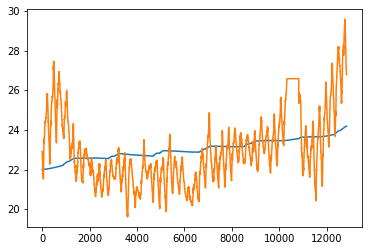

In [15]:
plt.plot(train['prediction_obs'])
plt.plot(train['state'])

In [7]:
sol=minimize(model.metric1,model.theta,args=(model.trainarray),options={'maxiter':200,'disp':True})

AttributeError: 'mainmodel' object has no attribute 'trainarray'

In [10]:
sol.x

array([1.00015711, 0.94095864, 1.05888278])

In [7]:
model.set_theta(sol.x)
model.update_theta()
model.dic_simulate(model.testdic)
dic=model.testdic[model.testdays[6]]

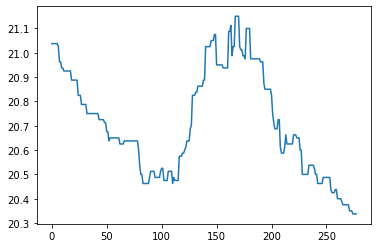

In [8]:
plt.plot(dic['state'])

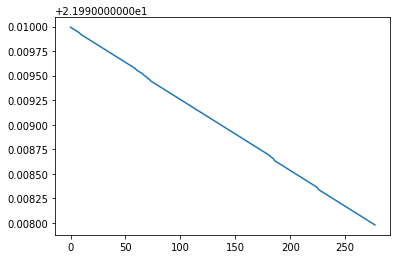

In [9]:
plt.plot(dic['predicted'])